In [1]:
import numpy as np
import scipy.stats as st
import skimage.transform
import matplotlib.pyplot as plt
import cv2
import scipy
import sklearn

In [29]:
def single_half_disk(radius):
    two_r_plus_1 = radius*2 + 1
    half_disk = np.ones([two_r_plus_1, two_r_plus_1])

    rs = np.power(radius,2)
    for i in range(radius):
        iss = np.power((i - radius),2)
        
        for j in range(two_r_plus_1):
            if (iss+ np.power((j - radius),2) < rs):
                half_disk[i, j] = 0
    return half_disk

def half_disk_bank(radius_list,orient):
    # scale=range(1,scales+1)
    # print(scale)
    orients=np.linspace(0,360,orient)
    # kernels=[[0 for x in range(1,scales)]for y in range(1,orient)]
    
    half_disk_bank_op = list()
    for each_rad in radius_list:
#         black_ones = np.ones([each_rad*2+1, each_rad*2+1])
        one_half_disk=single_half_disk(each_rad)
        for eachOrient in orients:
            image=skimage.transform.rotate(one_half_disk,eachOrient,cval=1)
#             np.logical_and(black_ones,image)
            half_disk_bank_op.append(image)
    return half_disk_bank_op

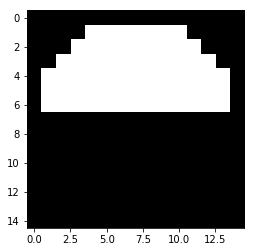

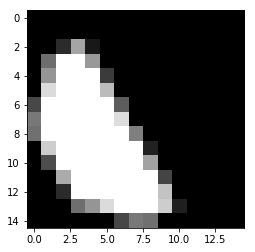

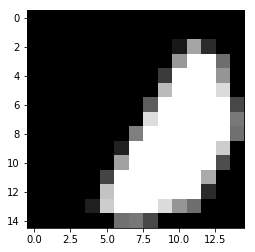

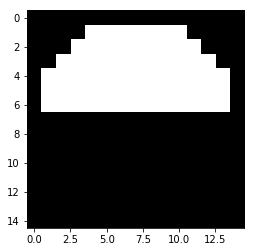

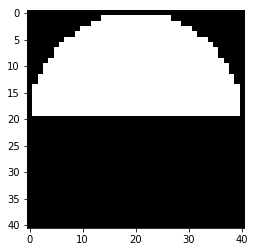

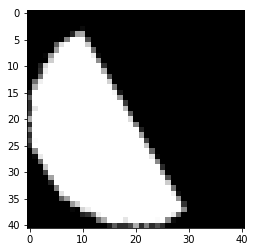

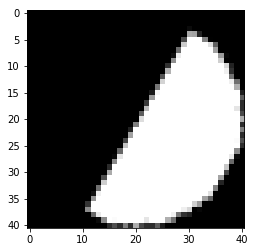

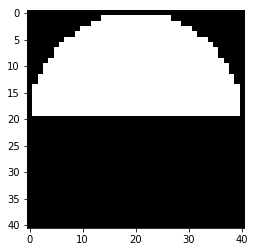

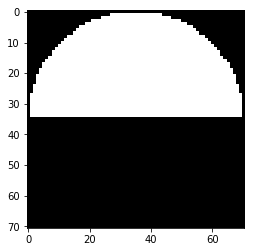

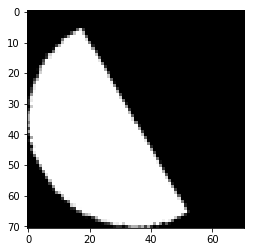

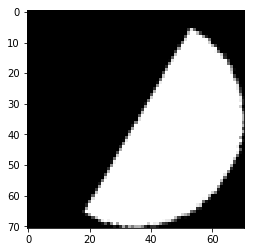

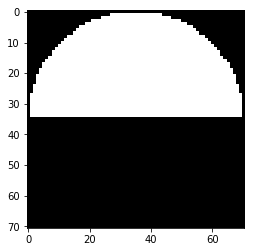

In [30]:
radius_list = [7,20,35]
orient = 4
half_disk = half_disk_bank(radius_list,orient)
for each in half_disk:
    plt.imshow(each,cmap='binary')
    plt.show()